MovieWriter ffmpeg unavailable; using Pillow instead.
/Users/Bella/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
/Users/Bella/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


ValueError: unknown file extension: .mp4

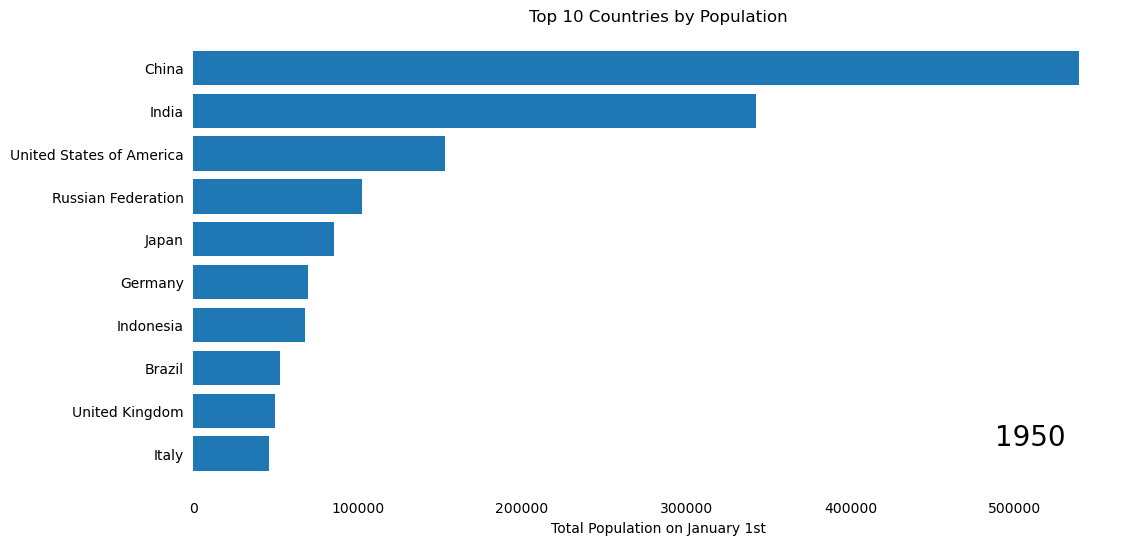

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def setup_plot_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='y', which='both', left=False)
    ax.tick_params(axis='x', which='both', bottom=False)
    ax.set_xlabel('Total Population on January 1st')
    ax.set_title('Top 10 Countries by Population')

def add_year_text(ax, year):
    ax.text(0.9, 0.1, str(year), transform=ax.transAxes, ha='center', fontsize=20)


def create_animation(df):
    df = pd.read_csv('/Users/Bella/Downloads/cleaned-data.csv')

    frames = df['Time'].unique()

    fig, ax = plt.subplots(figsize=(12,6))

    def animate(frame):
        ax.clear()

        population_data_frame = df[df['Time'] == frame]
        top_countries = population_data_frame.nlargest(10, 'TPopulation1Jan').sort_values('TPopulation1Jan', ascending=True)

        ax.barh(top_countries['Location'], top_countries['TPopulation1Jan'])

        setup_plot_style(ax)
        add_year_text(ax, frame)

    anim = animation.FuncAnimation(fig, animate, frames=frames, interval=200)

    return anim

if __name__ == '__main__':
    df = pd.read_csv('/Users/Bella/Downloads/cleaned-data.csv')
    anim = create_animation(df)
    anim.save('video.mp4', writer='ffmpeg', fps=30)
    plt.show()